<h1>Part 1: CMS Data Exercise - Payroll Based Journal (PBJ) Daily Nurse Staffing</h1>

---
### Recommendations for the Sales Leadership Team

1. *Optimize Contractor Utilization in the Northeast Region*
   - With the highest contractor hours percentage (13%), the Northeast region represents a significant opportunity Staffing Agencies.

2. *Focus on Medicaid Contractor Staffing for Illinois and West Virginia*
   - Data highlights a general trend of low contractor reliance for Medical Aides / Technician across most states, which is negligible, but IL (79%) and WV (100%) have higher demands for contractors.

3. *Prioritize staffing for Certified Nursing Assistants (CNAs), Licensed Practical Nurses (LPNs), and Registered Nurses (RNs)*
   - These roles currently show significant contractor utilization

4. *Strengthen Partnerships with Government Sectors*
   - Data indicates that government sectors employ the highest concentration of contract workers.
<br>
<br>
---



<h3>Analysis For Recommendation 1: Optimize Contractor Utilization in the Northeast Region</h3>

In [1]:
# Import libraries 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# load dataset
# The dataset provided 'Payroll Based Journal Daily Nursing Staff' as linked here (https://data.cms.gov/quality-of-care/payroll-based-journal-daily-nurse-staffing/data)
# Supportive dataset 'Skilled Nursing Facility Quality Reporting Program Provider' as linked here (https://data.cms.gov/provider-data/dataset/fykj-qjee) - for CMS Region Data
# Supportive dataset 'Provider Information' as linked here (https://data.cms.gov/provider-data/dataset/4pq5-n9py) - for Ownership Type

daily_nurse_staffing = pd.read_csv('C:/Users/ishap/OneDrive/Desktop/Clipboard Health Sales Data Analyst/PBJ_Daily_Nurse_Staffing_Q1_2024.csv', encoding='ISO-8859-1', low_memory = False)
program_provider_data = pd.read_csv('C:/Users/ishap/OneDrive/Desktop/Clipboard Health Sales Data Analyst/Skilled_Nursing_Facility_Quality_Reporting_Program_Provider_Data_Aug2024.csv', low_memory = False)
nh_provider_info = pd.read_csv('C:/Users/ishap/OneDrive/Desktop/Clipboard Health Sales Data Analyst/NH_ProviderInfo_Aug2024.csv', low_memory = False)

# Initial Exploration
pd.set_option('display.max_columns', None)

# Merging Datasets
nh_provider_info['CMS Certification Number (CCN)'] = nh_provider_info['CMS Certification Number (CCN)'].str.lstrip('0')
nh_provider = nh_provider_info[['CMS Certification Number (CCN)', 'Ownership Type']]

cms_region = program_provider_data[['CMS Certification Number (CCN)', 'CMS Region']]
cms_region = cms_region.drop_duplicates(subset='CMS Certification Number (CCN)')

daily_nurse_staffing = daily_nurse_staffing.rename(columns={'CMS Region_y': 'CMS Region'})
daily_nurse_staffing = daily_nurse_staffing.drop(columns=['CMS Region_x'], errors='ignore')

daily_nurse_staffing = daily_nurse_staffing.merge(nh_provider, left_on = 'PROVNUM', right_on = 'CMS Certification Number (CCN)', how = 'inner')

daily_nurse_staffing = daily_nurse_staffing.merge(cms_region, left_on = 'PROVNUM', right_on = 'CMS Certification Number (CCN)', how = 'inner')

In [2]:
daily_nurse_staffing.head()

,PROVNUM,PROVNAME,CITY,STATE,COUNTY_NAME,COUNTY_FIPS,CY_Qtr,WorkDate,MDScensus,Hrs_RNDON,Hrs_RNDON_emp,Hrs_RNDON_ctr,Hrs_RNadmin,Hrs_RNadmin_emp,Hrs_RNadmin_ctr,Hrs_RN,Hrs_RN_emp,Hrs_RN_ctr,Hrs_LPNadmin,Hrs_LPNadmin_emp,Hrs_LPNadmin_ctr,Hrs_LPN,Hrs_LPN_emp,Hrs_LPN_ctr,Hrs_CNA,Hrs_CNA_emp,Hrs_CNA_ctr,Hrs_NAtrn,Hrs_NAtrn_emp,Hrs_NAtrn_ctr,Hrs_MedAide,Hrs_MedAide_emp,Hrs_MedAide_ctr,CMS Certification Number (CCN)_x,Ownership Type,CMS Certification Number (CCN)_y,CMS Region
0,105001,BEDROCK REHABILITATION AND NURSING CENTER AT LAKE,EUSTIS,FL,Lake,69,2024Q1,20240101,85,0.0,0.0,0.0,0.0,0.0,0.0,26.75,0.75,26.00,0.0,0.0,0.0,68.75,50.00,18.75,192.75,177.50,15.25,0.0,0.0,0.0,0.0,0.0,0.0,105001,For profit - Limited Liability company,105001,4
1,105001,BEDROCK REHABILITATION AND NURSING CENTER AT LAKE,EUSTIS,FL,Lake,69,2024Q1,20240102,86,8.0,8.0,0.0,0.0,0.0,0.0,55.25,32.00,23.25,16.0,16.0,0.0,56.25,51.00,5.25,181.75,181.75,0.00,0.0,0.0,0.0,0.0,0.0,0.0,105001,For profit - Limited Liability company,105001,4
2,105001,BEDROCK REHABILITATION AND NURSING CENTER AT LAKE,EUSTIS,FL,Lake,69,2024Q1,20240103,86,8.0,8.0,0.0,0.0,0.0,0.0,37.00,32.00,5.00,8.0,8.0,0.0,75.50,63.25,12.25,183.75,183.75,0.00,0.0,0.0,0.0,0.0,0.0,0.0,105001,For profit - Limited Liability company,105001,4
3,105001,BEDROCK REHABILITATION AND NURSING CENTER AT LAKE,EUSTIS,FL,Lake,69,2024Q1,20240104,85,8.0,8.0,0.0,0.0,0.0,0.0,38.75,27.25,11.50,8.0,8.0,0.0,79.25,67.50,11.75,178.50,178.50,0.00,0.0,0.0,0.0,0.0,0.0,0.0,105001,For profit - Limited Liability company,105001,4
4,105001,BEDROCK REHABILITATION AND NURSING CENTER AT LAKE,EUSTIS,FL,Lake,69,2024Q1,20240105,86,8.0,8.0,0.0,0.0,0.0,0.0,40.50,23.50,17.00,8.0,8.0,0.0,64.00,57.25,6.75,178.75,178.75,0.00,0.0,0.0,0.0,0.0,0.0,0.0,105001,For profit - Limited Liability company,105001,4


In [3]:
daily_nurse_staffing.shape

(1168349, 37)

In [4]:
daily_nurse_staffing.describe()

,COUNTY_FIPS,WorkDate,MDScensus,Hrs_RNDON,Hrs_RNDON_emp,Hrs_RNDON_ctr,Hrs_RNadmin,Hrs_RNadmin_emp,Hrs_RNadmin_ctr,Hrs_RN,Hrs_RN_emp,Hrs_RN_ctr,Hrs_LPNadmin,Hrs_LPNadmin_emp,Hrs_LPNadmin_ctr,Hrs_LPN,Hrs_LPN_emp,Hrs_LPN_ctr,Hrs_CNA,Hrs_CNA_emp,Hrs_CNA_ctr,Hrs_NAtrn,Hrs_NAtrn_emp,Hrs_NAtrn_ctr,Hrs_MedAide,Hrs_MedAide_emp,Hrs_MedAide_ctr,CMS Region
count,1.168349e+06,1.168349e+06,1.168349e+06,1.168349e+06,1.168349e+06,1.168349e+06,1.168349e+06,1.168349e+06,1.168349e+06,1.168349e+06,1.168349e+06,1.168349e+06,1.168349e+06,1.168349e+06,1.168349e+06,1.168349e+06,1.168349e+06,1.168349e+06,1.168349e+06,1.168349e+06,1.168349e+06,1.168349e+06,1.168349e+06,1.168349e+06,1.168349e+06,1.168349e+06,1.168349e+06,1.168349e+06
mean,9.666703e+01,2.024022e+07,8.322709e+01,5.207907e+00,5.110152e+00,9.775493e-02,1.037145e+01,1.014003e+01,2.314231e-01,3.458668e+01,3.144862e+01,3.138058e+00,6.468675e+00,6.387991e+00,8.068396e-02,6.511510e+01,5.829209e+01,6.823001e+00,1.678592e+02,1.543410e+02,1.351816e+01,4.220481e+00,4.149855e+00,7.062585e-02,9.135017e+00,8.895399e+00,2.396177e-01,4.972973e+00
std,1.029178e+02,8.300737e+01,5.014031e+01,4.550699e+00,4.540774e+00,9.302403e-01,1.492021e+01,1.466716e+01,1.842825e+00,3.551036e+01,3.198277e+01,1.113826e+01,1.054717e+01,1.044646e+01,1.369884e+00,4.804680e+01,4.394313e+01,1.672170e+01,1.145248e+02,1.063284e+02,3.348222e+01,1.292254e+01,1.249961e+01,2.247619e+00,1.819018e+01,1.777193e+01,2.244691e+00,2.076984e+00
min,1.000000e+00,2.024010e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,3.100000e+01,2.024012e+07,5.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.288000e+01,1.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.184000e+01,2.687000e+01,0.000000e+00,9.397000e+01,8.500000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
50%,7.300000e+01,2.024022e+07,7.500000e+01,8.000000e+00,8.000000e+00,0.000000e+00,7.500000e+00,7.500000e+00,0.000000e+00,2.550000e+01,2.414000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.560000e+01,4.925000e+01,0.000000e+00,1.437100e+02,1.323200e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.000000e+00
75%,1.230000e+02,2.024031e+07,1.050000e+02,8.000000e+00,8.000000e+00,0.000000e+00,1.600000e+01,1.600000e+01,0.000000e+00,4.475000e+01,4.128000e+01,0.000000e+00,8.750000e+00,8.700000e+00,0.000000e+00,8.750000e+01,7.941000e+01,6.700000e+00,2.120000e+02,1.970400e+02,1.183000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.217000e+01,1.200000e+01,0.000000e+00,6.000000e+00
max,8.400000e+02,2.024033e+07,7.430000e+02,3.277500e+02,3.277500e+02,4.200000e+01,2.661500e+02,2.661500e+02,9.250000e+01,9.086200e+02,9.041500e+02,4.305900e+02,2.468000e+02,2.468000e+02,1.543700e+02,6.146500e+02,6.039800e+02,4.540000e+02,1.857740e+03,1.573080e+03,6.943000e+02,4.520000e+02,2.552500e+02,2.805000e+02,3.956500e+02,3.956500e+02,1.289000e+02,1.000000e+01


In [5]:
# Check for missing values
# print(daily_nurse_staffing.isnull().sum())
daily_nurse_staffing = daily_nurse_staffing.dropna()
daily_nurse_staffing = daily_nurse_staffing.drop_duplicates()

Listing states for Q1 2024 PBJ Daily Nurse Staffing

In [6]:
states = daily_nurse_staffing['STATE'].unique()
states

array(['FL', 'GA', 'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME',
       'MD', 'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ',
       'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'PR', 'RI', 'SC',
       'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY', 'CA'],
      dtype=object)

Lets look for concentration of full-time employees hours / contract employees hours by State

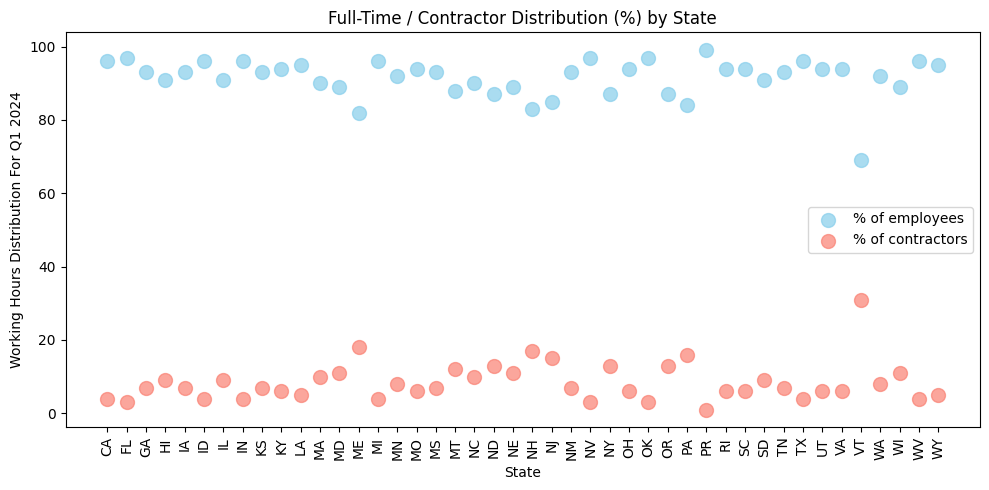

In [7]:
total_hours = daily_nurse_staffing.groupby('STATE').agg({
    'Hrs_RNDON' : 'sum',
    'Hrs_RNadmin' : 'sum',
    'Hrs_RN' : 'sum',
    'Hrs_LPNadmin' : 'sum',
    'Hrs_LPN' : 'sum',
    'Hrs_CNA' : 'sum',
    'Hrs_NAtrn' : 'sum',
    'Hrs_MedAide' : 'sum'
})

total_hours['total_hours'] = total_hours[['Hrs_RNDON', 'Hrs_RNadmin', 'Hrs_RN', 'Hrs_LPNadmin', 'Hrs_LPN', 'Hrs_CNA', 'Hrs_NAtrn', 'Hrs_MedAide']].sum(axis = 1)

employee_hours = daily_nurse_staffing.groupby('STATE').agg({
    'Hrs_RNDON_emp' : 'sum',
    'Hrs_RNadmin_emp' : 'sum',
    'Hrs_RN_emp' : 'sum',
    'Hrs_LPNadmin_emp' : 'sum',
    'Hrs_LPN_emp' : 'sum',
    'Hrs_CNA_emp' : 'sum',
    'Hrs_NAtrn_emp' : 'sum',
    'Hrs_MedAide_emp' : 'sum'
})

employee_hours['total_emp_hours'] = employee_hours[['Hrs_RNDON_emp', 'Hrs_RNadmin_emp', 'Hrs_RN_emp', 'Hrs_LPNadmin_emp', 'Hrs_LPN_emp', 'Hrs_CNA_emp', 'Hrs_NAtrn_emp', 'Hrs_MedAide_emp']].sum(axis = 1)

contract_hours = daily_nurse_staffing.groupby('STATE').agg({
    'Hrs_RNDON_ctr' : 'sum',
    'Hrs_RNadmin_ctr' : 'sum',
    'Hrs_RN_ctr' : 'sum',
    'Hrs_LPNadmin_ctr' : 'sum',
    'Hrs_LPN_ctr' : 'sum',
    'Hrs_CNA_ctr' : 'sum',
    'Hrs_NAtrn_ctr' : 'sum',
    'Hrs_MedAide_ctr' : 'sum'
})

contract_hours['total_ctr_hours'] = contract_hours[['Hrs_RNDON_ctr', 'Hrs_RNadmin_ctr', 'Hrs_RN_ctr', 'Hrs_LPNadmin_ctr', 'Hrs_LPN_ctr', 'Hrs_CNA_ctr', 'Hrs_NAtrn_ctr', 'Hrs_MedAide_ctr']].sum(axis = 1)


state_df = total_hours[['total_hours']].join(
    employee_hours[['total_emp_hours']], 
    how='left', 
    on='STATE'
).join(
    contract_hours[['total_ctr_hours']], 
    how='left', 
    on='STATE'
)

state_df['emp_contribution_by_percentage'] = (state_df['total_emp_hours'] / state_df['total_hours']).round(2) * 100
state_df['ctr_contribution_by_percentage'] = (state_df['total_ctr_hours'] / state_df['total_hours']).round(2) * 100

# state_df
plt.figure(figsize = (10,5))

plt.scatter(state_df.index, state_df['emp_contribution_by_percentage'], color = 'skyblue', label = '% of employees', s = 100, alpha = 0.7)
plt.scatter(state_df.index, state_df['ctr_contribution_by_percentage'], color = 'salmon', label = '% of contractors', s = 100, alpha = 0.7)
plt.xlabel('State')
plt.ylabel('Working Hours Distribution For Q1 2024')
plt.title('Full-Time / Contractor Distribution (%) by State')

plt.xticks(rotation=90)
plt.legend()

plt.tight_layout()
plt.show()

- The chart above shows working hours distribution for Q1 2024 of Full-time employees and contractors. 
- The key insights from the chart above is that there is a clear trend showing **a preference for full-time employment across all states**.

Now, let's add information about region and collect more information on contributions by contractors.

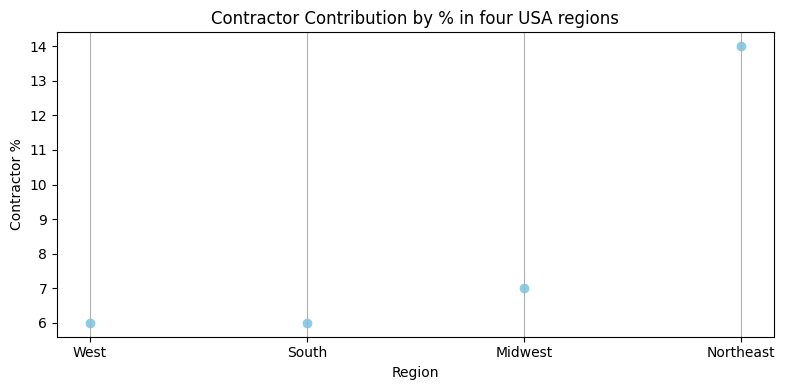

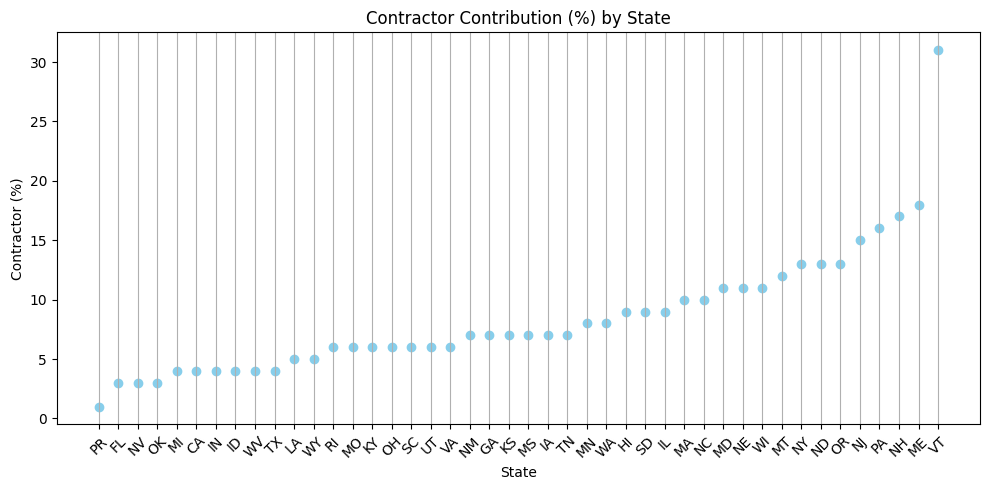

In [8]:
state_to_region = {
    # Northeast
    'ME': 'Northeast', 'NH': 'Northeast', 'VT': 'Northeast', 'MA': 'Northeast', 'RI': 'Northeast', 'CT': 'Northeast',
    'NY': 'Northeast', 'NJ': 'Northeast', 'PA': 'Northeast',
    
    # Midwest
    'OH': 'Midwest', 'IN': 'Midwest', 'IL': 'Midwest', 'MI': 'Midwest', 'WI': 'Midwest',
    'MN': 'Midwest', 'IA': 'Midwest', 'MO': 'Midwest', 'ND': 'Midwest', 'SD': 'Midwest', 'NE': 'Midwest', 'KS': 'Midwest',
    
    # South
    'DE': 'South', 'MD': 'South', 'VA': 'South', 'WV': 'South', 'NC': 'South', 'SC': 'South', 'GA': 'South', 'FL': 'South',
    'KY': 'South', 'TN': 'South', 'AL': 'South', 'MS': 'South',
    'AR': 'South', 'LA': 'South', 'OK': 'South', 'TX': 'South',
    
    # West
    'MT': 'West', 'ID': 'West', 'WY': 'West', 'CO': 'West', 'NM': 'West', 'AZ': 'West', 'UT': 'West', 'NV': 'West',
    'WA': 'West', 'OR': 'West', 'CA': 'West', 'AK': 'West', 'HI': 'West'
}

daily_nurse_staffing['Region'] = daily_nurse_staffing['STATE'].map(state_to_region)

total_hours = daily_nurse_staffing.groupby('Region').agg({
    'Hrs_RNDON' : 'sum',
    'Hrs_RNadmin' : 'sum',
    'Hrs_RN' : 'sum',
    'Hrs_LPNadmin' : 'sum',
    'Hrs_LPN' : 'sum',
    'Hrs_CNA' : 'sum',
    'Hrs_NAtrn' : 'sum',
    'Hrs_MedAide' : 'sum'
})

total_hours['total_hours'] = total_hours[['Hrs_RNDON', 'Hrs_RNadmin', 'Hrs_RN', 'Hrs_LPNadmin', 'Hrs_LPN', 'Hrs_CNA', 'Hrs_NAtrn', 'Hrs_MedAide']].sum(axis = 1)

employee_hours = daily_nurse_staffing.groupby('Region').agg({
    'Hrs_RNDON_emp' : 'sum',
    'Hrs_RNadmin_emp' : 'sum',
    'Hrs_RN_emp' : 'sum',
    'Hrs_LPNadmin_emp' : 'sum',
    'Hrs_LPN_emp' : 'sum',
    'Hrs_CNA_emp' : 'sum',
    'Hrs_NAtrn_emp' : 'sum',
    'Hrs_MedAide_emp' : 'sum'
})

employee_hours['total_emp_hours'] = employee_hours[['Hrs_RNDON_emp', 'Hrs_RNadmin_emp', 'Hrs_RN_emp', 'Hrs_LPNadmin_emp', 'Hrs_LPN_emp', 'Hrs_CNA_emp', 'Hrs_NAtrn_emp', 'Hrs_MedAide_emp']].sum(axis = 1)

contract_hours = daily_nurse_staffing.groupby('Region').agg({
    'Hrs_RNDON_ctr' : 'sum',
    'Hrs_RNadmin_ctr' : 'sum',
    'Hrs_RN_ctr' : 'sum',
    'Hrs_LPNadmin_ctr' : 'sum',
    'Hrs_LPN_ctr' : 'sum',
    'Hrs_CNA_ctr' : 'sum',
    'Hrs_NAtrn_ctr' : 'sum',
    'Hrs_MedAide_ctr' : 'sum'
})

contract_hours['total_ctr_hours'] = contract_hours[['Hrs_RNDON_ctr', 'Hrs_RNadmin_ctr', 'Hrs_RN_ctr', 'Hrs_LPNadmin_ctr', 'Hrs_LPN_ctr', 'Hrs_CNA_ctr', 'Hrs_NAtrn_ctr', 'Hrs_MedAide_ctr']].sum(axis = 1)


region_df = total_hours[['total_hours']].join(
    employee_hours[['total_emp_hours']], 
    how='left', 
    on='Region'
).join(
    contract_hours[['total_ctr_hours']], 
    how='left', 
    on='Region'
)

region_df['emp_contribution_by_percentage'] = (region_df['total_emp_hours'] / region_df['total_hours']).round(2) * 100
region_df['ctr_contribution_by_percentage'] = (region_df['total_ctr_hours'] / region_df['total_hours']).round(2) * 100

sorted_ctr_hours = region_df.sort_values(by='ctr_contribution_by_percentage')

plt.figure(figsize=(8, 4))
plt.scatter(sorted_ctr_hours.index, sorted_ctr_hours['ctr_contribution_by_percentage'], color='skyblue')
plt.xlabel('Region')
plt.ylabel('Contractor %')
plt.title('Contractor Contribution by % in four USA regions')
plt.xticks()
plt.tight_layout()
plt.grid(True, axis = 'x')

# Show plot
plt.show()

sorted_ctr_hours = state_df.sort_values(by='ctr_contribution_by_percentage')

plt.figure(figsize=(10, 5))
plt.scatter(sorted_ctr_hours.index, sorted_ctr_hours['ctr_contribution_by_percentage'], color='skyblue')
plt.xlabel('State')
plt.ylabel('Contractor (%)')
plt.title('Contractor Contribution (%) by State')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True, axis = 'x')

# Show plot
plt.show()

- From the chart, **Northeastern states (NJ, PA, NH, ME, VT)** have the high percentage of contractor employees with highest in Vermont.
- In contrast, states such as **AL, AR, FL, NV, and OK** show the lowest percentage of contractor employees. These states are all located in the **Southern** and **Western** regions of the USA, indicating a regional trend where there is a lower reliance on contractor staffing in these areas.
<br>
<br>
---


<h3>Analysis For Recommendation 2: Focus on Medicaid contractor staffing for Illinois and West Virginia</h3>

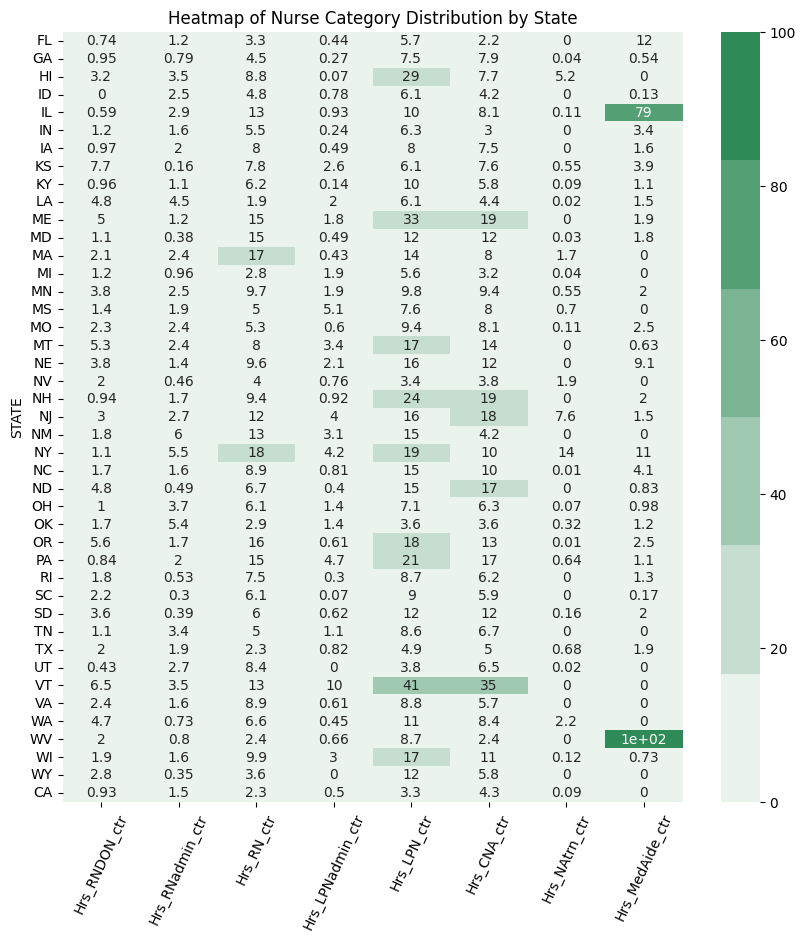

In [9]:
new_result = pd.DataFrame()
new_result['STATE'] = daily_nurse_staffing['STATE'].unique()

categories = [
    ('Hrs_RNDON', 'Hrs_RNDON_ctr'),
    ('Hrs_RNadmin', 'Hrs_RNadmin_ctr'),
    ('Hrs_RN', 'Hrs_RN_ctr'),
    ('Hrs_LPNadmin', 'Hrs_LPNadmin_ctr'),
    ('Hrs_LPN', 'Hrs_LPN_ctr'),
    ('Hrs_CNA', 'Hrs_CNA_ctr'),
    ('Hrs_NAtrn', 'Hrs_NAtrn_ctr'),
    ('Hrs_MedAide', 'Hrs_MedAide_ctr')
]

for total_hours, contract_hours in categories:
    staffing = daily_nurse_staffing.groupby('STATE').agg({total_hours: 'sum', contract_hours: 'sum'})
    contract_hrs_percentage = ((staffing[contract_hours] / staffing[total_hours]) * 100).round(2)
    new_result = new_result.merge(contract_hrs_percentage.rename(f'{contract_hours}'), on='STATE', how='left')

# Remove rows where all columns are NaN (to avoid dropping rows prematurely)
result_clean = new_result.dropna(how='all', subset=[f'{contract_hours}' for _, contract_hours in categories])

new_result


plt.figure(figsize=(10,10))
cmap = sns.light_palette("seagreen")
sns.heatmap(new_result.set_index('STATE').dropna(), annot=True, cmap=cmap)
plt.xticks(rotation = 65)
plt.title('Heatmap of Nurse Category Distribution by State')

plt.show()

- This chart clearly has an outlier on `Hrs_MedAide_ctr`. So, let's remove it and see the details. We can investigate `Hrs_MedAide_ctr` separately.

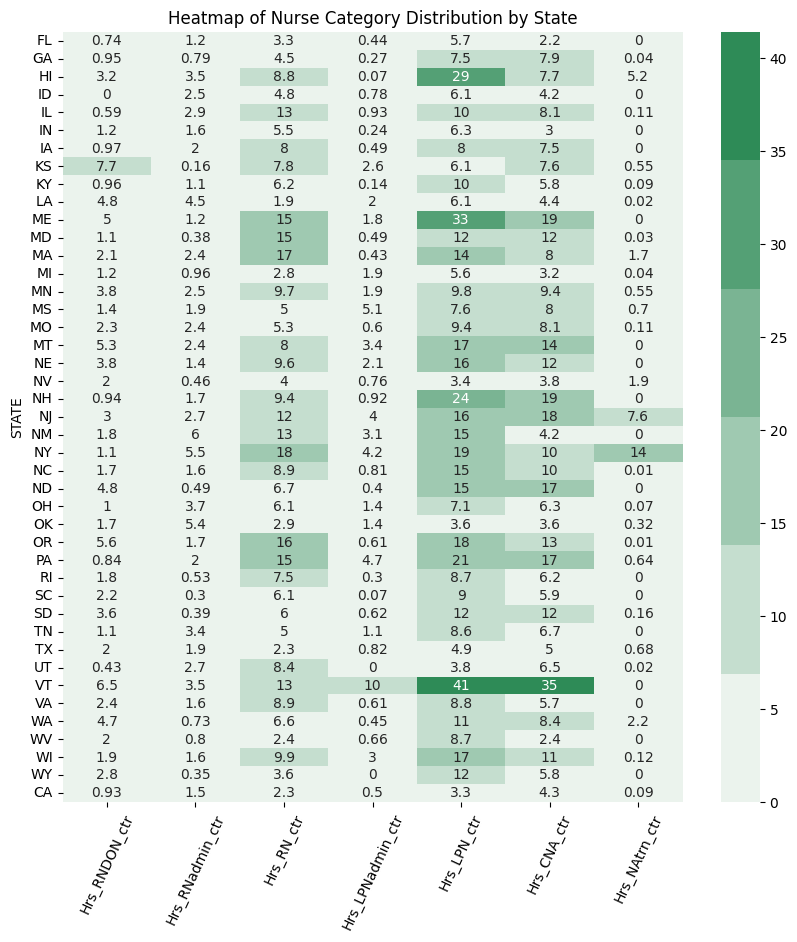

In [10]:
new_result = pd.DataFrame()
new_result['STATE'] = daily_nurse_staffing['STATE'].unique()

categories = [
    ('Hrs_RNDON', 'Hrs_RNDON_ctr'),
    ('Hrs_RNadmin', 'Hrs_RNadmin_ctr'),
    ('Hrs_RN', 'Hrs_RN_ctr'),
    ('Hrs_LPNadmin', 'Hrs_LPNadmin_ctr'),
    ('Hrs_LPN', 'Hrs_LPN_ctr'),
    ('Hrs_CNA', 'Hrs_CNA_ctr'),
    ('Hrs_NAtrn', 'Hrs_NAtrn_ctr')
]
for total_hours, contract_hours in categories:
    staffing = daily_nurse_staffing.groupby('STATE').agg({total_hours: 'sum', contract_hours: 'sum'})
 
    contract_hrs_percentage = ((staffing[contract_hours] / staffing[total_hours]) * 100).round(2)
   
    new_result = new_result.merge(contract_hrs_percentage.rename(f'{contract_hours}'), on='STATE', how='left')


new_result

plt.figure(figsize=(10,10))
cmap = sns.light_palette("seagreen")
sns.heatmap(new_result.set_index('STATE').dropna(), annot=True, cmap=cmap)
plt.xticks(rotation = 65)
plt.title('Heatmap of Nurse Category Distribution by State')

plt.show()


- Positions such as Registered Nurse (RN), Certified Nursing Assistant (CNA), and Licensed Practical Nurse (LPN) show the highest concentration of contract employment, highlighting the heavy reliance on temporary staffing for these roles.
- Administrative positions within the nursing industry, including RN Admin, LPN Admin, and Director of Nursing, are predominantly filled by permanent employees rather than contractors.

Now, let's look at the outlier `Hrs_MedAide_ctr` using the Box plot.

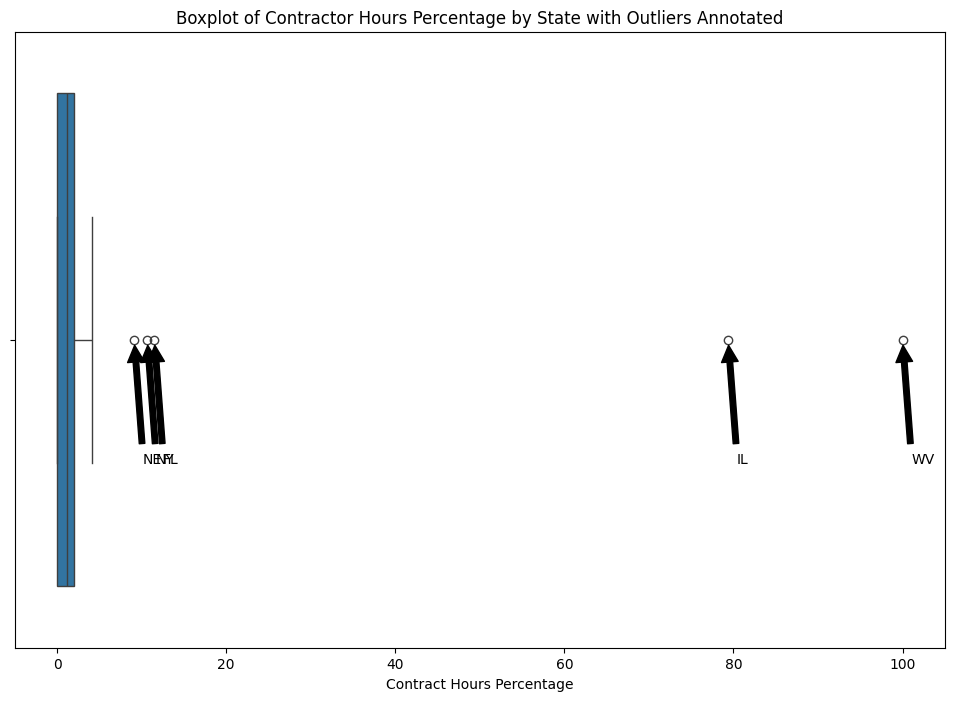

In [11]:
staffing = daily_nurse_staffing.groupby('STATE').agg({
    'Hrs_MedAide': 'sum', 
    'Hrs_MedAide_ctr': 'sum'
})

staffing['Contract_Hrs_Percentage'] = ((staffing['Hrs_MedAide_ctr'] / staffing['Hrs_MedAide']) * 100).round(2)
result = staffing.reset_index()

result[['STATE', 'Contract_Hrs_Percentage']]

plt.figure(figsize=(12, 8))
sns.boxplot(x='Contract_Hrs_Percentage', data=result)

Q1 = result['Contract_Hrs_Percentage'].quantile(0.25)
Q3 = result['Contract_Hrs_Percentage'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = result[(result['Contract_Hrs_Percentage'] < lower_bound) | (result['Contract_Hrs_Percentage'] > upper_bound)]

for i in range(outliers.shape[0]):
    plt.annotate(outliers.iloc[i]['STATE'], 
                 xy=(outliers.iloc[i]['Contract_Hrs_Percentage'], 0), 
                 xytext=(outliers.iloc[i]['Contract_Hrs_Percentage'] + 1, 0.2), 
                 arrowprops=dict(facecolor='black', shrink=0.05))

plt.title('Boxplot of Contractor Hours Percentage by State with Outliers Annotated')
plt.xlabel('Contract Hours Percentage')

plt.show()


This boxplot highlights a general trend of low contractor reliance for Medical Aides across most states which is negligible, but **IL (79%) and WV (100%)** have higher demands for contractors.

<br>

---


<h3>Analysis For Recommendation 3: Address Staffing Needs for Certified Nursing Assistant (CNA), Licensed Practical Nurse (LPN), and Registered Nurse (RN)</h3>

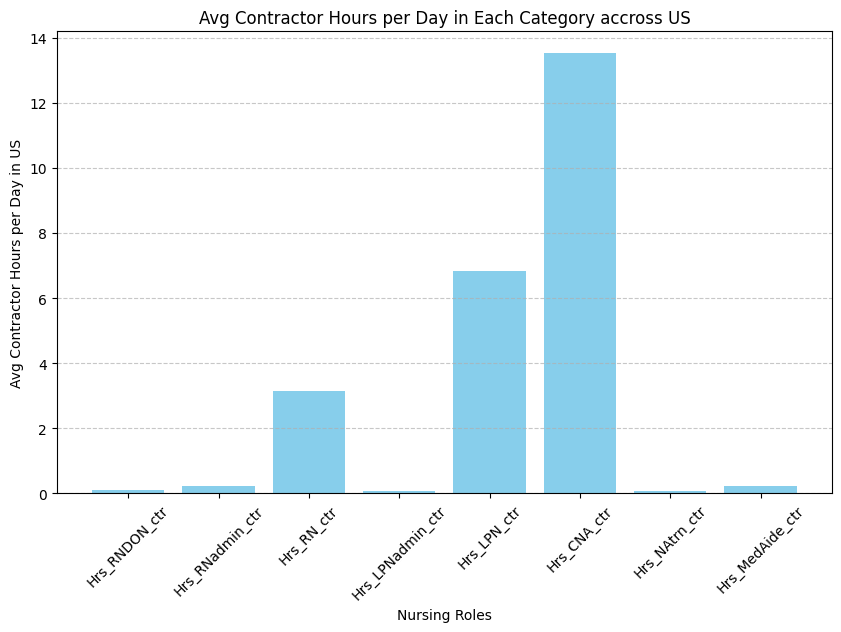

In [12]:
categories = [
    'Hrs_RNDON_ctr',
    'Hrs_RNadmin_ctr',
    'Hrs_RN_ctr',
    'Hrs_LPNadmin_ctr',
    'Hrs_LPN_ctr',
    'Hrs_CNA_ctr',
    'Hrs_NAtrn_ctr',
    'Hrs_MedAide_ctr'
]
mean_dict = {}

for category in categories:
    mean_value = daily_nurse_staffing[category].mean().round(2)
    mean_dict[f'{category}'] = mean_value

mean_result = pd.DataFrame([mean_dict])
plt.figure(figsize=(10, 6))
plt.bar(mean_result.columns, mean_result.iloc[0], color='skyblue')
plt.xlabel('Nursing Roles')
plt.ylabel('Avg Contractor Hours per Day in US')
plt.title('Avg Contractor Hours per Day in Each Category accross US')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

This chart shows that Certified Nursing Assistant (CNA), Licenced Practical Nurse (LPN) andRegistered Nurse (RN) are in high demand in that order.

Let's explore the top three nursing categories that account for the highest contractor hours across each region.

           Hrs_RN_ctr  Hrs_LPN_ctr  Hrs_CNA_ctr
Region                                         
Midwest          2.49         3.98         9.74
Northeast        8.42        17.22        32.05
South            1.54         5.48         9.33
West             2.23         4.16        10.70


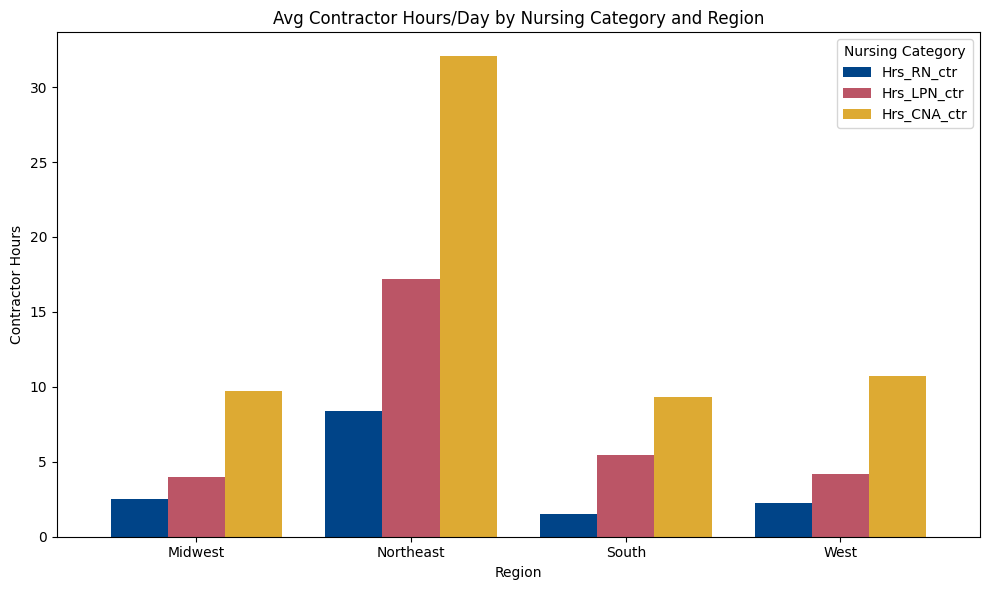

In [13]:
categories = [
    'Hrs_RN_ctr',
    'Hrs_LPN_ctr',
    'Hrs_CNA_ctr'
]
mean_result = pd.DataFrame()

for category in categories:
    mean_result[category] = daily_nurse_staffing.groupby('Region')[category].mean().round(2)
   
mean_result.reset_index()
print(mean_result)
colors = ['#004488', '#BB5566', '#DDAA33']
ax = mean_result.plot(kind='bar', figsize=(10, 6), width=0.8, color = colors)

plt.title('Avg Contractor Hours/Day by Nursing Category and Region')
plt.xlabel('Region')
plt.ylabel('Contractor Hours')
plt.xticks(rotation=0)
plt.legend(title='Nursing Category')

plt.tight_layout()
plt.show()

Key Insights:
  - Across all regions, **CNA contractor hours** dominate, suggesting that **Certified Nursing Assistants** are more likely to be employed as contractors compared to other nursing roles.
  - The **LPN** roles follow closely in contractor employment, especially in the **Northeast and South** regions.
  - **Registered Nurse (RN)** contractor hours remain consistently low in all regions, indicating a possible preference for **permanent employment** in these roles.


Let's explore the top three nursing categories that account for the highest contractor hours across each **CMS (Centers for Medical & Medicaid Services) region**:

               Hrs_RN_ctr  Hrs_LPN_ctr  Hrs_CNA_ctr
CMS Region                                         
Boston               6.04        11.66        21.73
New York            11.02        19.86        37.42
Philadelphia         5.56        13.59        24.17
Atlanta              1.68         6.38        10.55
Chicago              2.89         4.33         9.62
Dallas               0.53         3.27         5.88
Kansas City          1.61         3.17         8.71
Denver               2.58         3.10        14.93
San Francisco        1.38         3.28         9.04
Seattle              2.70         5.80        14.11


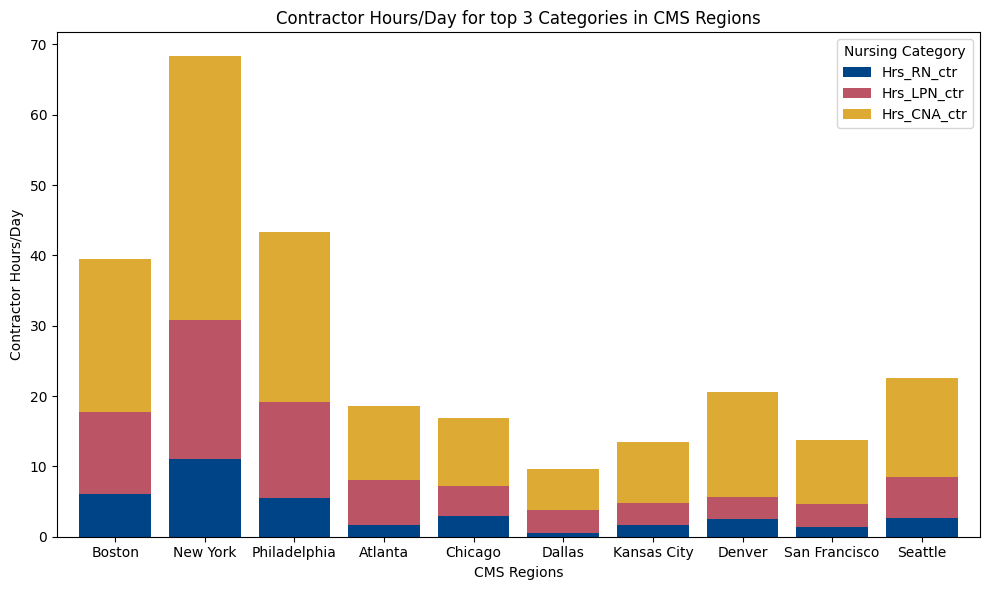

In [14]:
categories = [
    'Hrs_RN_ctr',
    'Hrs_LPN_ctr',
    'Hrs_CNA_ctr'
]
mean_result = pd.DataFrame()

for category in categories:
    mean_result[category] = daily_nurse_staffing.groupby('CMS Region')[category].mean().round(2)

# CMS region mapping
cms_region_mapping = {
    1: 'Boston',
    2: 'New York',
    3: 'Philadelphia',
    4: 'Atlanta',
    5: 'Chicago',
    6: 'Dallas',
    7: 'Kansas City',
    8: 'Denver',
    9: 'San Francisco',
    10: 'Seattle'
}

# Update the index to use the region names
mean_result.index = mean_result.index.map(cms_region_mapping)

# Display the result
print(mean_result)
colors = ['#004488', '#BB5566', '#DDAA33']
ax = mean_result.plot(kind='bar', stacked=True, figsize=(10, 6), width=0.8, color=colors)

plt.title('Contractor Hours/Day for top 3 Categories in CMS Regions')
plt.xlabel('CMS Regions')
plt.ylabel('Contractor Hours/Day')
plt.xticks(rotation=0)
plt.legend(title='Nursing Category')

plt.tight_layout()
plt.show()

- The graph illustrates contractor hours per day for the top three nursing roles ordered by **Certified Nursing Assistant (CNA)**, **Licensed Practical Nurse (LPN)**, **Registered Nurse (RN)** across various CMS regions.  
- This analysis highlights that contractor employment is primarily concentrated in **Certified Nursing Assistants (CNA)** across all CMS regions, with **Regions New York, Philadelphia, and Boston** having the highest contractor hours.

<h3>Analysis For Recommendation 4: Strengthen Partnerships with Government Sectors</h3>

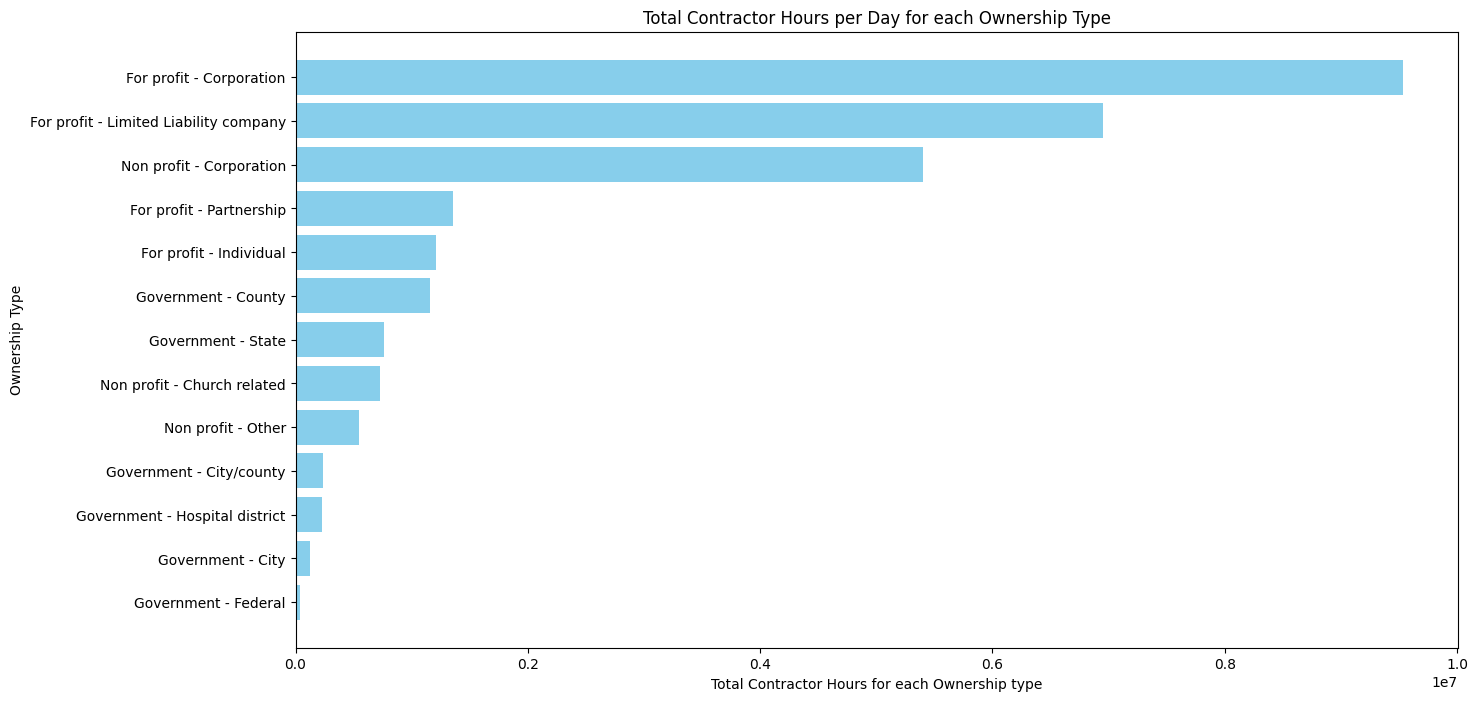

In [15]:
categories = [
    'Hrs_RNDON_ctr',
    'Hrs_RNadmin_ctr',
    'Hrs_RN_ctr',
    'Hrs_LPNadmin_ctr',
    'Hrs_LPN_ctr',
    'Hrs_CNA_ctr',
    'Hrs_NAtrn_ctr',
    'Hrs_MedAide_ctr'
]

# Calculating total contractor hours for the specified categories, grouped by 'Ownership Type'
total_contract_hours = daily_nurse_staffing.groupby('Ownership Type')[categories].sum().sum(axis= 1).round(2).reset_index()

# Renaming columns for clarity
total_contract_hours.columns = ['Ownership Type', 'Total Contractor Hours for each Ownership type']

total_contract_hoursby_ownership_type_sorted = total_contract_hours.sort_values(by='Total Contractor Hours for each Ownership type', ascending=False)

plt.figure(figsize=(15, 8))
plt.barh(total_contract_hoursby_ownership_type_sorted['Ownership Type'], total_contract_hoursby_ownership_type_sorted['Total Contractor Hours for each Ownership type'], color='skyblue')
plt.xlabel('Total Contractor Hours for each Ownership type')
plt.ylabel('Ownership Type')
plt.title('Total Contractor Hours per Day for each Ownership Type')
plt.gca().invert_yaxis()  
plt.show()

This graph shows total contactor hours, highlighting the obvious that corporations and LLCs are the bigger clients of billable hours!

Let's look at the average contractor hours by day accross US different ownership types.

Average Contract Hours (all categories) in each Ownership Type:

                            Ownership Type  \
0                 For profit - Corporation   
1                  For profit - Individual   
2   For profit - Limited Liability company   
3                 For profit - Partnership   
4                        Government - City   
5                 Government - City/county   
6                      Government - County   
7                     Government - Federal   
8           Government - Hospital district   
9                       Government - State   
10             Non profit - Church related   
11                Non profit - Corporation   
12                      Non profit - Other   

    Avg Contractor Hours for each Ownership type  
0                                          20.96  
1                                          20.45  
2                                          24.93  
3                                          33.07  
4                                          25.65  
5                                          51.39 

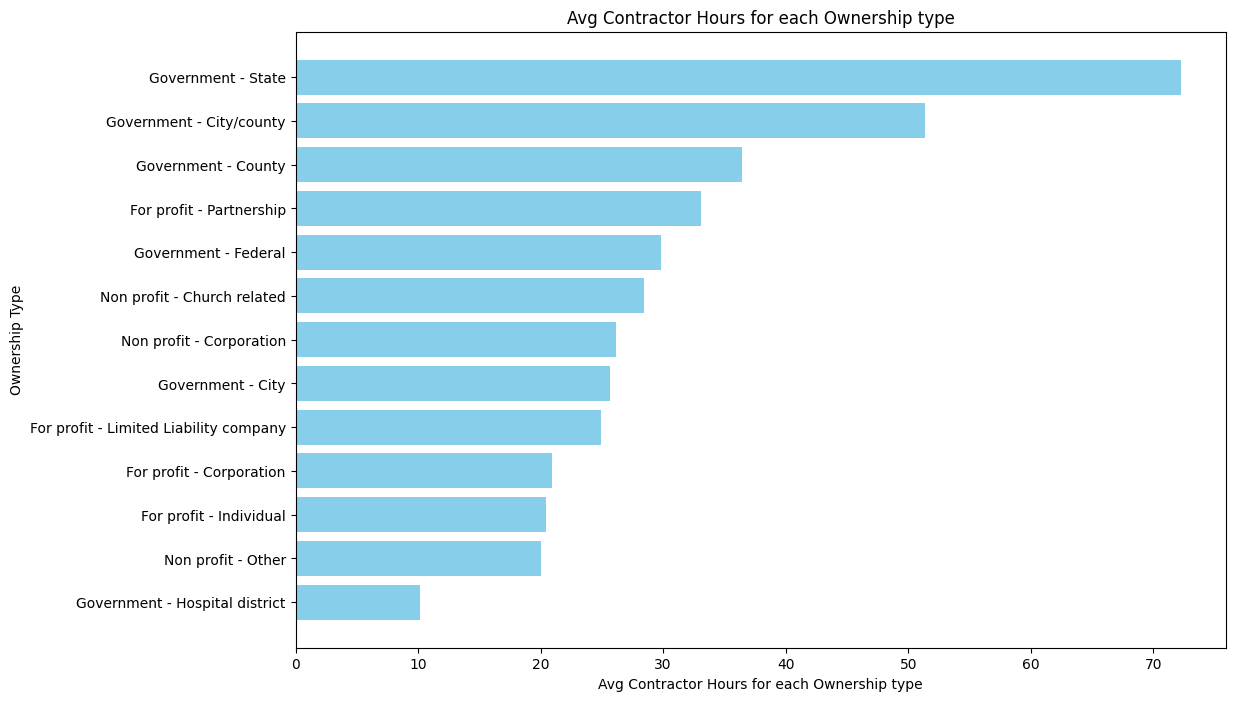

In [16]:
categories = [
    'Hrs_RNDON_ctr',
    'Hrs_RNadmin_ctr',
    'Hrs_RN_ctr',
    'Hrs_LPNadmin_ctr',
    'Hrs_LPN_ctr',
    'Hrs_CNA_ctr',
    'Hrs_NAtrn_ctr',
    'Hrs_MedAide_ctr'
]
# Step 1: Summing the values across all specified categories for each row
daily_nurse_staffing['total_hours'] = daily_nurse_staffing[categories].sum(axis=1)

# Step 2: Grouping by 'Ownership Type' and summing the 'total_hours' for each group
total_hours_per_type = daily_nurse_staffing.groupby('Ownership Type')['total_hours'].sum()

# Step 3: Counting the number of records for each 'Ownership Type'
count_per_type = daily_nurse_staffing.groupby('Ownership Type').size()

# Step 4: Dividing the total hours by the number of records in each 'Ownership Type' group
average_hours_per_type = (total_hours_per_type / count_per_type).round(2)

# Reset index for a clean DataFrame
average_hours_per_type = average_hours_per_type.reset_index()

# Renaming columns for clarity
average_hours_per_type.columns = ['Ownership Type', 'Avg Contractor Hours for each Ownership type']

print(average_hours_per_type)

average_hours_per_type_sorted = average_hours_per_type.sort_values(by='Avg Contractor Hours for each Ownership type', ascending=False)

plt.figure(figsize=(12, 8))
plt.barh(average_hours_per_type_sorted['Ownership Type'], average_hours_per_type_sorted['Avg Contractor Hours for each Ownership type'], color='skyblue')
plt.xlabel('Avg Contractor Hours for each Ownership type')
plt.ylabel('Ownership Type')
plt.title('Avg Contractor Hours for each Ownership type')
plt.gca().invert_yaxis()  
plt.show()

This analysis suggests that government entities, especially at the state and city levels, may be ideal targets for contractor staffing services, while non-profits and smaller for-profit organizations might present limited demand.

             Ownership Type  Total Contractor Hours
9        Government - State                    9.03
5  Government - City/county                    6.42
6       Government - County                    4.55
                          Hrs_LPN_ctr  Hrs_RN_ctr  Hrs_CNA_ctr
Ownership Type                                                
Government - City/county        12.46        5.96        31.97
Government - County             10.37        3.93        21.00
Government - State              14.35        7.42        48.02


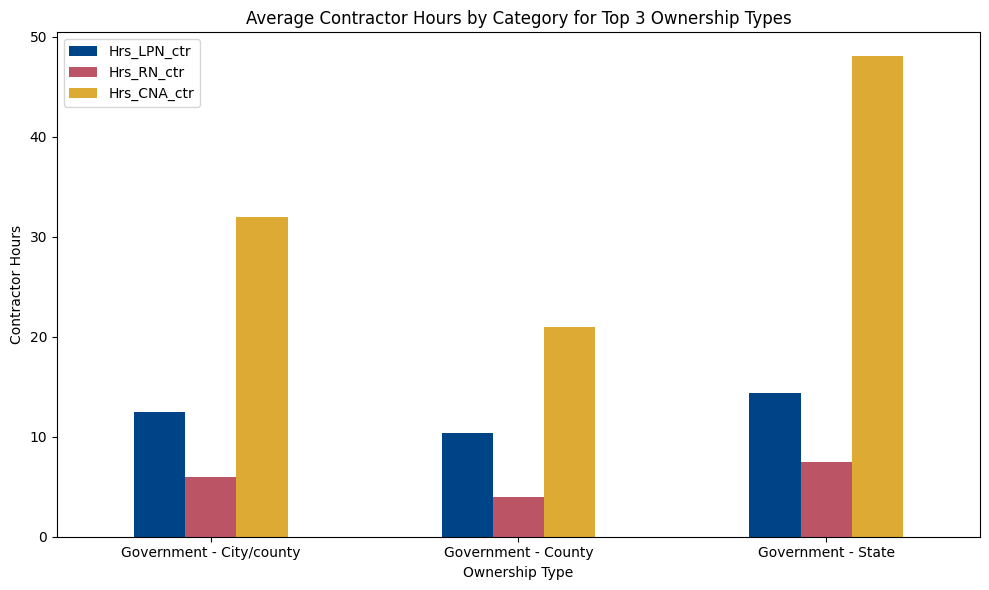

In [17]:
ctr_columns = [col for col in daily_nurse_staffing.columns if 'ctr' in col]

total_contract_hours = daily_nurse_staffing.groupby('Ownership Type')[ctr_columns].mean().mean(axis=1).round(2).reset_index()
total_contract_hours.columns = ['Ownership Type', 'Total Contractor Hours']
total_contract_hours


top_3_contract_hours = total_contract_hours.sort_values(by='Total Contractor Hours', ascending=False).head(3)
print(top_3_contract_hours)


top_3_ownership_types = total_contract_hours.sort_values(by='Total Contractor Hours', ascending=False).head(3)['Ownership Type']
selected_categories = ['Hrs_LPN_ctr', 'Hrs_RN_ctr', 'Hrs_CNA_ctr']

top_3_categories = daily_nurse_staffing[daily_nurse_staffing['Ownership Type'].isin(top_3_ownership_types)][['Ownership Type'] + selected_categories]

top_3_categories_mean = top_3_categories.groupby('Ownership Type')[selected_categories].mean().round(2)
print(top_3_categories_mean)

colors = ['#004488', '#BB5566', '#DDAA33']
ax = top_3_categories_mean.plot(kind='bar', figsize=(10, 6), color = colors)

ax.set_ylabel('Contractor Hours')
ax.set_title('Average Contractor Hours by Category for Top 3 Ownership Types')

plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

This breakdown reveals that CNA contractors are in highest demand in government facilities, particularly state-owned ones. This trend suggests that staffing strategies could prioritize CNA recruitment when targeting government entities.